In [41]:
import pandas as pd
import numpy as np
import sqlite3, os
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
conn = sqlite3.connect('echeck.sqlite')

In [197]:
#conn.close()

## define function for complicated queries

In [6]:
def pysql(sqlcode):
    return pd.read_sql (sqlcode, conn)

In [201]:
sql_code = '''
SELECT count(*) FROM checks;
'''

In [202]:
pysql(sql_code)

,count(*)
0,4226316


In [112]:
#csv_chunks  = pd.read_csv('./homeless/MyLA311_Service_Request_Data_2018.csv', chunksize = 10000)
#for chunk in csv_chunks:
    #chunk.Location = chunk.Location.astype('str')
    #chunk.to_sql(name='calls', con = conn, index = False, if_exists='append')

In [88]:
#json to sqlite
#data = pd.read_json('https://data.lacity.org/resource/h65r-yf5i.json')
#data.location = data.location.astype('str')
#data.to_sql(name='calls', con = conn, index = False, if_exists='append')

## view the columns of tables

In [35]:
pd.read_sql ('SELECT * FROM checks LIMIT 1;', conn)

,ID NUMBER,FISCAL YEAR,DEPARTMENT NAME,VENDOR NAME,TRANSACTION DATE,DOLLAR AMOUNT,AUTHORITY,BUSINESS TAX REGISTRATION CERTIFICATE,GOVERNMENT ACTIVITY,FUND GROUP NAME,...,BUYER NAME,SUPPLIER CITY,SUPPLIER COUNTRY,BU NAME,SITE LOCATION,ITEM CODE,ITEM CODE NAME,CURRENCY,VALUE OF SPEND,VENDOR NUM
0,1054063,2015,TRANSPORTATION,FLINT TRADING INC,08/15/2014,3913.0,59334,0000993910,"TRANSPORTATION, COMMERCE AND ENTERPRISE",GOVERNMENTAL,...,Z90BPT,THOMASVILLE,USA,CITY,LOS ANGELES,795.0,THERMOPLASTIC RESINS,USD,3913.0,0000035377 - FLINT TRADING INC


In [30]:
pd.read_sql ('SELECT * FROM funds LIMIT 1;', conn)

,Fund,Fund Name,Cash,Department Name,Fund Purpose,Sources of Funds,Eligible Uses,Fund Category,Ending Fund Balance,Assets,...,Replacement of GF Allowed,Any Overhead Costs Remitted to GF,Overhead Costs Reimbursement Eligibility,Interest to GF,Interest Reversion Eligibility,GF Reversion,Inactive Fund - Close,Contact,Phone,Email
0,458,LOW INCOME HOUSING TAX CREDIT,None,Housing and Community Investment Department,To be used to assist any low income rental cit...,All fee income received by the City for the re...,"Processing of private party applications, prov...",Community Development,0.0,None,...,No,No,No,Yes,Not Applicable,No,Yes,Lyndon O. Salvador,(213) 744-9044,lyndon.salvador@lacity.org


In [172]:
pd.read_sql ('SELECT * FROM calls LIMIT 1;', conn).T

,0
SRNumber,1-78597941
CreatedDate,12/10/2015 09:34:41 AM
UpdatedDate,12/11/2015 08:55:00 AM
ActionTaken,SR Created
Owner,BOS
RequestType,Metal/Household Appliances
Status,Closed
RequestSource,Mobile App
MobileOS,Android
Anonymous,Y


## view 311 call related statistics

potentially a metric for efficiency

In [179]:
pd.read_sql ('SELECT substr(CreatedDate,7,4) year,count(*) count FROM calls GROUP BY substr(CreatedDate,7,4);', conn)

,year,count
0,2015,237360
1,2016,952760
2,2017,1131784
3,2018,591959


In [194]:
sql_code = '''
SELECT c1.year,c1.count total_count,c2.count homeless_count,c2.count*1.0/c1.count*1.0 rate
FROM
(SELECT substr(CreatedDate,7,4) year,count(*) count 
FROM calls
GROUP BY substr(CreatedDate,7,4)) c1
JOIN 
(SELECT substr(CreatedDate,7,4) year,count(*) count 
FROM calls 
WHERE RequestType = "Homeless Encampment"
GROUP BY substr(CreatedDate,7,4)) c2
ON c1.year = c2.year
;
'''
pysql(sql_code)

,year,total_count,homeless_count,rate
0,2015,237360,1423,0.005995
1,2016,952760,14726,0.015456
2,2017,1131784,25626,0.022642
3,2018,591959,17886,0.030215


In [ ]:
sql_code = '''
SELECT substr(CreatedDate,7,4) year, MobileOS, count(*) count 
FROM calls 
GROUP BY substr(CreatedDate,7,4), MobileOS;
'''
pysql(sql_code)

In [195]:
pd.read_sql ('SELECT substr(CreatedDate,7,4) year,MobileOS,count(*) count FROM calls GROUP BY substr(CreatedDate,7,4),MobileOS;', conn)

,year,MobileOS,count
0,2015,None,204315
1,2015,Android,32967
2,2015,iOS,78
3,2016,None,814319
4,2016,Android,50502
5,2016,iOS,87939
6,2017,None,940409
7,2017,Android,61337
8,2017,iOS,130038
9,2018,None,479763


## observing what amounts are spent on what funds

In [31]:
df = pd.read_sql ('SELECT c.* FROM checks c JOIN funds f WHERE c.FUND = f.Fund;', conn)

In [38]:
df.loc[:,['DESCRIPTION','DETAILED ITEM DESCRIPTION']]

,DESCRIPTION,DETAILED ITEM DESCRIPTION
0,"HEWCE273A - TONER CRG,CLJ CP55","HEWCE273A - TONER CRG,CLJ CP5525,13K,MAG"
1,NSP 2/ARRA PROGRAM OPERATION,None
2,DUE TO COUNTIES,None
3,DUE TO COUNTIES,None
4,OCCIDENTAL COLLEGE: URBAN AND ENVIRONMENTAL,None
5,TECHNICAL SERVICES,None
6,TECHNICAL SERVICES,None
7,TECHNICAL SERVICES,None
8,DUE TO COUNTIES,None
9,DUE TO COUNTIES,None


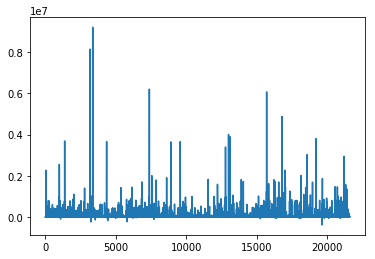

In [43]:
df['DOLLAR AMOUNT'].plot()

In [63]:
df[df['DOLLAR AMOUNT'] >= 20000].loc[:,['FUND NAME','DESCRIPTION','DETAILED ITEM DESCRIPTION','DOLLAR AMOUNT']]\
.sort_values('DOLLAR AMOUNT',ascending=False).iloc[20:40,:]

,FUND NAME,DESCRIPTION,DETAILED ITEM DESCRIPTION,DOLLAR AMOUNT
18150,HOME INVESTMENT PARTSHIP PROGR,AFFORDABLE HOUSING TRUST FUND,None,2015210.86
7555,HOME INVESTMENT PARTSHIP PROGR,AFFORDABLE HOUSING TRUST,None,2000000.00
7556,HOME INVESTMENT PARTSHIP PROGR,AFFORDABLE HOUSING TRUST FUND,None,1985739.00
8608,CITY OF LA AFFORDABLE HOUSING,GF-PSHP,None,1908475.00
19657,FEDERAL EMERGENCY SHELTER GRNT,LAHSA,None,1866777.18
11556,CITY OF LA AFFORDABLE HOUSING,HOMELESS SHELTER PROGRAM,None,1829002.00
13905,CITY OF LA AFFORDABLE HOUSING,HOMELESS SHELTER PROGRAM,None,1822688.00
16220,CITY OF LA AFFORDABLE HOUSING,HOMELESS SHELTER PROGRAM,None,1810814.00
7871,ARRA-HOMELESSNESS PREV & REHSE,HPRP/ARRA-RAPID RE-HSG FIN ASS,None,1794987.00
21213,HOME INVESTMENT PARTSHIP PROGR,LOAN AGREEMENT WITH THE CITY OF LA C-127914,JS;METRO VILLAS 345 LP;345 N WESTM;14504;; / ...,1738703.00


In [12]:
df.columns

Index(['ID NUMBER', 'FISCAL YEAR', 'DEPARTMENT NAME', 'VENDOR NAME',
       'TRANSACTION DATE', 'DOLLAR AMOUNT', 'AUTHORITY',
       'BUSINESS TAX REGISTRATION CERTIFICATE', 'GOVERNMENT ACTIVITY',
       'FUND GROUP NAME', 'FUND TYPE', 'FUND NAME', 'FUND', 'ACCOUNT NAME',
       'ACCOUNT CODE', 'TRANSACTION ID', 'EXPENDITURE TYPE',
       'SETTLEMENT/JUDGMENT', 'FISCAL MONTH NUMBER', 'FISCAL YEAR-MONTH',
       'FISCAL YEAR-QUARTER', 'CALENDAR MONTH NUMBER', 'CALENDAR MONTH/YEAR',
       'CALENDAR MONTH', 'DATA SOURCE', 'AUTHORITY NAME', 'AUTHORITY LINK',
       'DEPARTMENT NUMBER', 'PROGRAM', 'VENDOR ID', 'ZIP', 'PAYMENT METHOD',
       'PAYMENT STATUS', 'INV NUM', 'INVOICE DUE DATE',
       'INVOICE DISCOUNT DUE DATE', 'INV DATE', 'INV LINE',
       'INVOICE DISTRIBUTION LINE', 'PO NUM', 'DESCRIPTION',
       'DETAILED ITEM DESCRIPTION', 'UNIT PRICE', 'UNIT OF MEASURE',
       'QUANTITY', 'SALES TAX PERCENT', 'SALES TAX', 'DISCOUNT', 'RECEIVER ID',
       'PO DATE', 'PO LINE NUMBER',